In [1]:
import pandas as pd
import numpy as np

In [6]:
df_phone = pd.read_csv('phone_data.csv')
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [8]:
import dateutil

#스트링으로 되어있는 날짜 데이터를 날짜 데이터 형식으로 바꿔줌
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [9]:
df_phone.groupby("month")

<Axes: xlabel='month'>

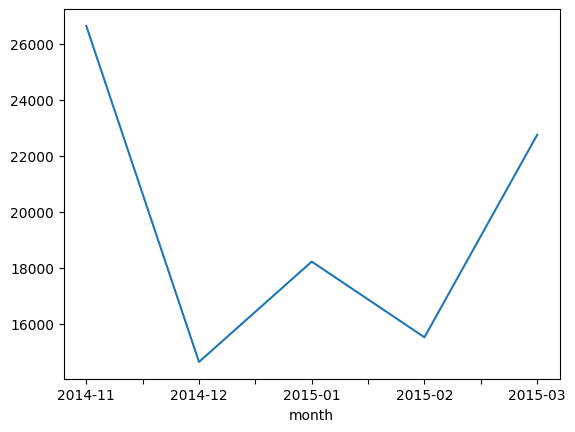

In [13]:
import matplotlib.pyplot as plt

#달마다 그룹해서 수치 확인 가능
df_phone.groupby("month")["duration"].sum().plot()

<Axes: xlabel='month'>

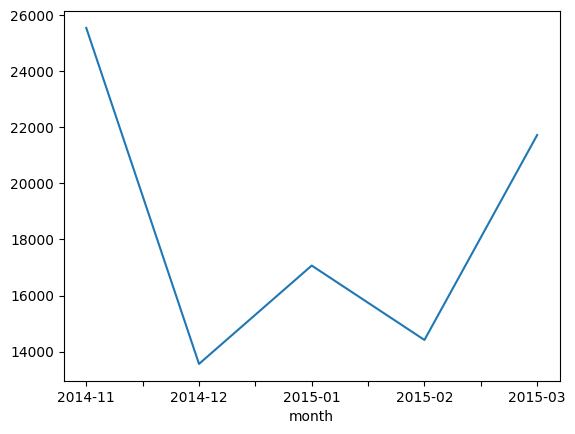

In [14]:
df_phone[df_phone["item"] == "call"].groupby("month")["duration"].sum().plot()

<Axes: xlabel='month'>

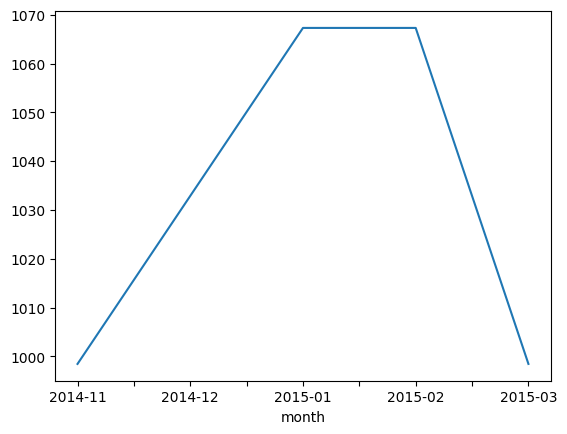

In [15]:
df_phone[df_phone["item"] == "data"].groupby("month")["duration"].sum().plot()

<Axes: xlabel='month'>

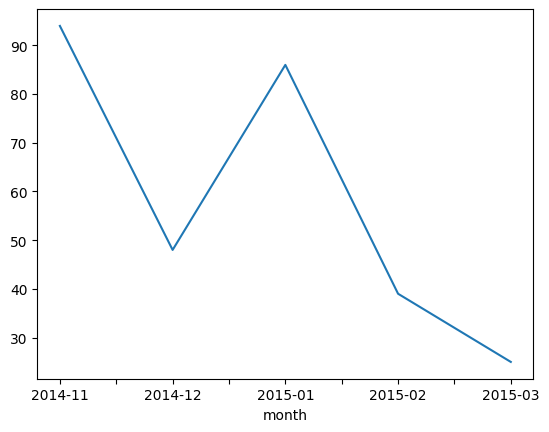

In [16]:
df_phone[df_phone["item"] == "sms"].groupby("month")["duration"].sum().plot()

In [19]:
df_phone.groupby(["month", "item"])["duration"].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

In [20]:
df_phone.groupby(["month", "item"])["duration"].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<Axes: xlabel='month'>

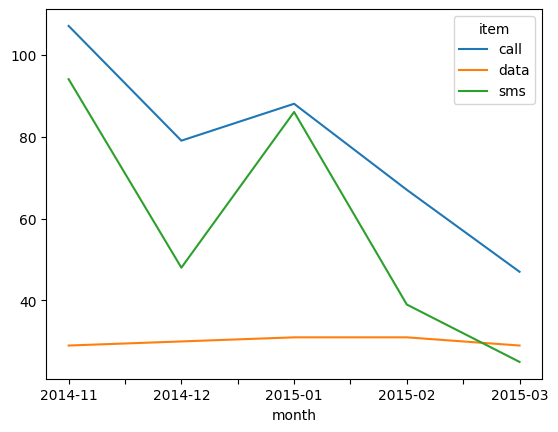

In [18]:
#아이템 별로
df_phone.groupby(["month", "item"])["duration"].count().unstack().plot()

In [21]:
df_phone.groupby("month", as_index=False).agg({"duration" : "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [22]:
df_phone.groupby(["month", "item"]).agg(
    {
        "duration": sum,
        "network_type" : "count",
        "date": "first"
    }
) #get the first date per group

/tmp/ipython-input-22-146207549.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_phone.groupby(["month", "item"]).agg(


duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [23]:
df_phone.groupby(["month", "item"]).agg(
    {
        "duration": [min, max, sum],
        "network_type" : "count",
        "date": [min, "first", "nunique"]
    }
) #get the first date per group

/tmp/ipython-input-23-613975629.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_phone.groupby(["month", "item"]).agg(
/tmp/ipython-input-23-613975629.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_phone.groupby(["month", "item"]).agg(
/tmp/ipython-input-23-613975629.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_phone.groupby(["month", "item"]).agg(
/tmp/ipython-input-23-613975629.py:1: FutureWarning: The provide

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [25]:
grouped = df_phone.groupby(["month", "item"]).agg({"duration": [min, max, np.mean]})

grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns = {'min':'min_duration', 'max':'max_duration', 'mean':'mean_duration'})

/tmp/ipython-input-25-1170112401.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped = df_phone.groupby(["month", "item"]).agg({"duration": [min, max, np.mean]})
/tmp/ipython-input-25-1170112401.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped = df_phone.groupby(["month", "item"]).agg({"duration": [min, max, np.mean]})
/tmp/ipython-input-25-1170112401.py:1: FutureWarning: The provided callable <function mean at 0x7cd66a1ea3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gr

min_duration  max_duration  mean_duration
month   item                                           
2014-11 call         1.000      1940.000     238.757009
        data        34.429        34.429      34.429000
        sms          1.000         1.000       1.000000
2014-12 call         2.000      2120.000     171.658228
        data        34.429        34.429      34.429000
        sms          1.000         1.000       1.000000
2015-01 call         2.000      1859.000     193.977273
        data        34.429        34.429      34.429000
        sms          1.000         1.000       1.000000
2015-02 call         1.000      1863.000     215.164179
        data        34.429        34.429      34.429000
        sms          1.000         1.000       1.000000
2015-03 call         2.000     10528.000     462.276596
        data        34.429        34.429      34.429000
        sms          1.000         1.000       1.000000

In [26]:
grouped.add_prefix("duration")

durationmin  durationmax  durationmean
month   item                                        
2014-11 call        1.000     1940.000    238.757009
        data       34.429       34.429     34.429000
        sms         1.000        1.000      1.000000
2014-12 call        2.000     2120.000    171.658228
        data       34.429       34.429     34.429000
        sms         1.000        1.000      1.000000
2015-01 call        2.000     1859.000    193.977273
        data       34.429       34.429     34.429000
        sms         1.000        1.000      1.000000
2015-02 call        1.000     1863.000    215.164179
        data       34.429       34.429     34.429000
        sms         1.000        1.000      1.000000
2015-03 call        2.000    10528.000    462.276596
        data       34.429       34.429     34.429000
        sms         1.000        1.000      1.000000

---

pivot table

In [27]:
df_phone = pd.read_csv("phone_data.csv")
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [31]:
df_phone.pivot_table(
    values = ['duration'],
    index=[df_phone.month, df_phone.item],
    columns = df_phone.network,
    aggfunc='sum',
    fill_value=0
)

duration                                                       \
network        Meteor   Tesco    Three Vodafone      data landline special   
month   item                                                                 
2014-11 call   1521.0  4045.0  12458.0   4316.0     0.000   2906.0     0.0   
        data      0.0     0.0      0.0      0.0   998.441      0.0     0.0   
        sms      10.0     3.0     25.0     55.0     0.000      0.0     1.0   
2014-12 call   2010.0  1819.0   6316.0   1302.0     0.000   1424.0     0.0   
        data      0.0     0.0      0.0      0.0  1032.870      0.0     0.0   
        sms      12.0     1.0     13.0     18.0     0.000      0.0     0.0   
2015-01 call   2207.0  2904.0   6445.0   3626.0     0.000   1603.0     0.0   
        data      0.0     0.0      0.0      0.0  1067.299      0.0     0.0   
        sms      10.0     3.0     33.0     40.0     0.000      0.0     0.0   
2015-02 call   1188.0  4087.0   6279.0   1864.0     0.000    730.0     0.0   
        data      0.0     0.0      0.0      0.0  1067.299      0.0     0.0   
        sms       1.0     2.0     11.0     23.0     0.000      0.0     2.0   
2015-03 call    274.0   973.0   4966.0   3513.0     0.000  11770.0     0.0   
        data      0.0     0.0      0.0      0.0   998.441      0.0     0.0   
        sms       0.0     4.0      5.0     13.0     0.000      0.0     0.0   

                              
network      voicemail world  
month   item                  
2014-11 call     301.0   0.0  
        data       0.0   0.0  
        sms        0.0   0.0  
2014-12 call     690.0   0.0  
        data       0.0   0.0  
        sms        0.0   4.0  
2015-01 call     285.0   0.0  
        data       0.0   0.0  
        sms        0.0   0.0  
2015-02 call     268.0   0.0  
        data       0.0   0.0  
        sms        0.0   0.0  
2015-03 call     231.0   0.0  
        data       0.0   0.0  
        sms        0.0   3.0

In [34]:
#위 피벗 테이블을 그룹바이로
df_phone.groupby(['month', 'item', 'network'])['duration'].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0